## Types of batching

Stochastic(1 sample at a time),Full batch (on the whole training set), mini-batch (16-128 samples)

(9996, 130, 13)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64

Epoch 48/50
219/219 [==============================] - 3s 12ms/step - loss: 2.1266 - accuracy: 0.4622 - val_loss: 2.1656 - val_accuracy: 0.4848
Epoch 49/50
219/219 [==============================] - 3s 12ms/step - loss: 2.0897 - accuracy: 0.4789 - val_loss: 2.1412 - val_accuracy: 0.4932
Epoch 50/50
219/219 [==============================] - 3s 12ms/step - loss: 2.0334 - accuracy: 0.4916 - val_loss: 2.0876 - val_accuracy: 0.4948


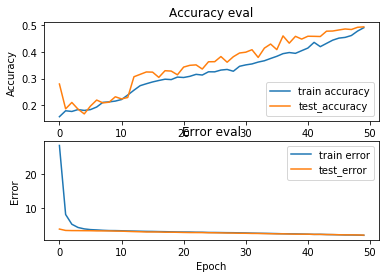

In [7]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

dataset_path = "genres/data.json"


def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    #convert lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    #create the accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test_accuracy")
    axs[0].set_ylabel("Accuracy")
    #axs[0].set_xlabel("Epoch")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    #create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test_error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


if __name__ == "__main__":

    #load data
    X, y = load_data(dataset_path)
    print(X.shape)

    #split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    #build the network architecture
    model = keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        #relu is better in convergence
        #relu reduces the likelihood of vanishing gradient

        #1st hidden layer
        keras.layers.Dense(512,
                           activation="relu",
                           kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #2nd hidden layer
        keras.layers.Dense(256,
                           activation="relu",
                           kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #3rd hidden layer
        keras.layers.Dense(64,
                           activation="relu",
                           kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        #output layer
        keras.layers.Dense(10, activation="sigmoid")
    ])

    #compile network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    model.summary()

    #train model
    history = model.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        batch_size=32,
                        epochs=50)

    #plot accuracy and error over the epochs
    plot_history(history)

## Solving overfitting

(1) simpler architecture: remove layers, decrease number of neurons, no universal rule 

(2) data augmentation: artificially increase number of training samples, apply transformations to audio files (pitch shifting, time stretching, adding background noise


(3) early stopping: choose rules to stop training

(4) dropout: randomly drop neurons while training, increased netowrk robustness, dropout probability 0.1-0.5

(5) regularization: add penalty to error function, punish large weights, L1 and L2

L1 regularization: Minimizes absolute value of weights, robust to outliers, generates simple model. $\lambda$ is the hyper parameter we need to tweak. $E(p.y) = 1/2 \times (p-y)^2 + \lambda \sum |W_i|$

L2 regularization: Minimizes square value of weights, not robust to outliers, learns complex patterns. $E(p.y) = 1/2 \times (p-y)^2 + \lambda \sum (W_i)^2$